## EE 242 Lab 3b – Convolution - Denoising audio signals

**Yehoshua Luna, Aaron Mcbride, Ben Eisenhart** 

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, and matplotlib.pyplot.  

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, display

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of convolution and smoothing on the sound of the signals.

## Lab 3b turn in checklist

• Lab 3b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 2 -- Smoothing Signals

In this assignment, we’ll implement a moving window smoothing function to show how you can use convolution to remove noise from a signal. We’ll use a discrete signal associated with a sampling period, and plot signals as if they were continuous to make it easier to see the effect of smoothing. The base signal is generated randomly, so you can run the cell multiple times to see how the results look for different signals.  This assignment will have three parts, A-C.

**A.**  Using the starter code provided, create a base time signal and a noisy version of it by adding random noise generated with the numpy.random.randn() function (the standard normal distribution, which is zero mean and unit variance). Plot the original and noisy signals with 2x1 subplots, with the time axis labeled assuming a sampling rate of 1000 Hz. Constrain the y-axis to be [0,25] for all plots. 

**B.**  Create a smoothed version of the signal called filtsig1 by computing the average value over a +/- k samples using the numpy.mean() function and k=20. You will need to make a decision as to how to handle the first and last k samples, for which there won’t be a full k samples available in both directions. In a single plot, plot the noisy signal and the filtered signal overlaid on the original signal.

**C.**  Define a vector hfilt that corresponds to box of length N=2k+1 and height 1/N. Create a second smoothed version of the signal called filtsig2 by convolving the base signal with hfilt using the numpy.convolve() function. Plot the two different filtered signal outputs overlaid on each other. Note that the convolve function will change the length, so you will need to define a new time vector for that. 



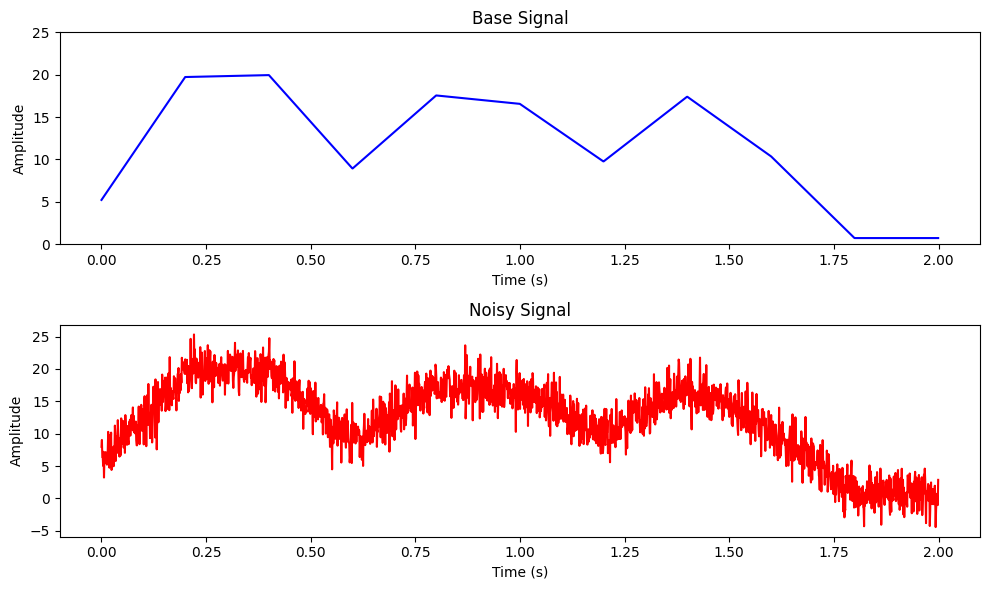

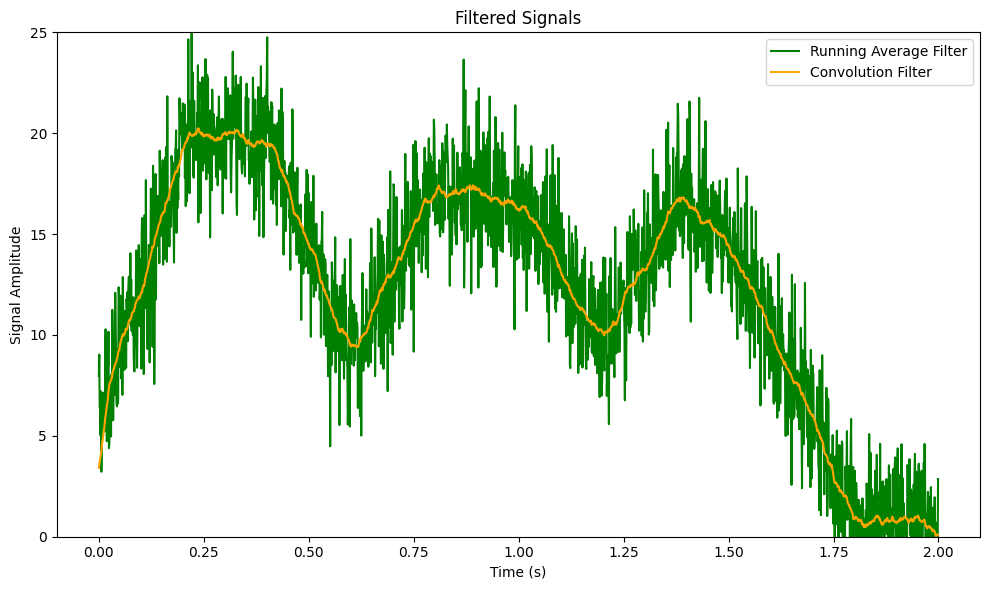

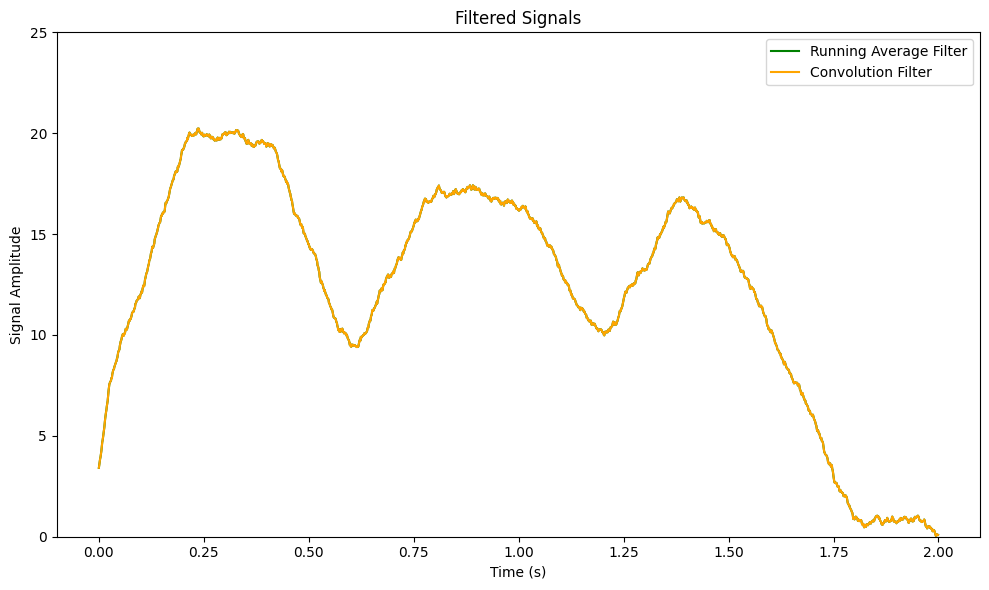

In [51]:
#########################################################################################################
# Assignment 2 - Smoothing Signals
#########################################################################################################

# Relevant setup parameters.
srate = 1000 # Sampling rate in Hz
time = np.arange(0, 2, 1/srate) # Associated time vector that corresponds to 2 seconds
n = len(time) # Length of the time vector

# Base signal with values chosen randomly.
p = 10 # Points for piecewise linear signal
amp = 20 # Amplitude range of base signal
base = np.interp(np.linspace(0, p, n), np.arange(0, p), np.random.rand(p) * amp)

# Random noise to be added to the base signal.
noiseamp = 2 # Amplitude of the noise
noise = noiseamp * np.random.randn(n)

#########################################################################################################
# Part A
#########################################################################################################

# Adds noise to the base signal to create a new noisy signal
noisy_signal = base + noise

# Plots the base signal.
fig, axs = plt.subplots(2, 1, figsize = (10, 6))
axs[0].plot(time, base, label = 'Base Signal', color = 'blue')
axs[0].set_title('Base Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim(0, 25)

# Plots the noisy signal.
axs[1].plot(time, noisy_signal, label = 'Noisy Signal', color = 'red')
axs[1].set_title('Noisy Signal')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[0].set_ylim(0, 25)

# Tightens layout and shows the plots.
plt.tight_layout()
plt.show()

#########################################################################################################
# Part B
#########################################################################################################

# This function implements a running mean filter using a for-loop.
# For each sample t, it outputs the value np.mean (x[t-k:t+k]).
# arr: The input signal to be filtered.
# k: The number of samples to consider before and after the current sample.
# Returns the filtered signal.
def running_average(arr, k):
    padded_arr = np.pad(arr, k, mode = "constant") # Pads array
    smoothed = np.zeros_like(arr) # Creates blank smoothed array

    for back, front, in zip(range(0, len(arr)), range(2 * k, len(padded_arr))):
        smoothed[back] = np.mean(padded_arr[back : front + 1]) # Averages values in window of size 2k + 1
    
    return smoothed # Returns the smoothed signal


# Calculates the running average of the noisy signal.
running_avg_sig = running_average(noisy_signal, 25)

# Generates a plot overlaying the filter signal and the noisy signal.
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(time, noisy_signal, label='Running Average Filter', color='green')
axs.plot(time, running_avg_sig, label='Convolution Filter', color='orange')
axs.set_title('Filtered Signals')
axs.set_xlabel('Time (s)')
axs.set_ylabel('Signal Amplitude')
axs.legend()
axs.set_ylim(0, 25)

# Tightens and shows the plot.
plt.tight_layout()
plt.show()

#########################################################################################################
# Part C
#########################################################################################################

# Function used to filter a signal using convolve function.
# signal: The input signal to be filtered.
# k: The number of samples to consider before and after the current sample.
# Returns the filtered signal.
def convolve_filter(signal, k):
    # Generate filter
    N = 2 * k + 1
    hfilt = np.ones(N) / N
    
    # Perform convolution with the filter
    filtsig2 = np.convolve(signal, hfilt, mode='same')
    return filtsig2

# Uses both filters on the noisy signal
running_avg_sig = running_average(noisy_signal, 25)
convolve_sig = convolve_filter(noisy_signal, 25)

# Generates plot for both filtered signals and overlays them.
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(time, running_avg_sig, label='Running Average Filter', color='green')
axs.plot(time, convolve_sig, label='Convolution Filter', color='orange')
axs.set_title('Filtered Signals')
axs.set_xlabel('Time (s)')
axs.set_ylabel('Signal Amplitude')
axs.legend()
axs.set_ylim(0, 25)

# Shows and tightens the plot
plt.tight_layout()
plt.show()


###  Discussion

**Question:**  
Describe the differences in the results using the two methods and explain these differences in terms of system properties. Comment on how the results and plots change when you amplify the noise more and also change the value of k.  
  
**Answer:**  
There is no difference in results between the two methods. Both implment the exact same running average, as the graph comparing both filters shows. Therefore, there is also no difference in system properties, though the convolution method will run faster because NumPy's more algorithm is more efficient. When the noise is amplified more, the filter does not work as well, and the filtered signal looks less like the original base signal. The reverse is also true. When the noise is reduced, the running average filter works better and produces something very similar to the orignal base signal. When the value of k (window size) is increased, the filter averages over a large range of values, which rounds the sharp corners that would normally be present in the base signal, sacrificing precision and higher-frequency features for smoothness. Likewise, when k is reduced, the filter better maintains the sharp corners in the base signal but does not remove the noise as well, sacfricing smoothness for higher-frequency features.


## Assignment 3 -- Removing Noise from an Audio Signal

In this assignment, we’ll artificially add noise to an audio signal and then apply the system you used in Assignment 2 to remove it. You will need the audio packages that you used in Lab 1. This assignment will have three parts, A-C

**A.** Read in the trombone sound file provided and name it tr_orig.  This is a mono signal, so we will only need to worry about the single channel. Create a noise sequence that is the length of tr_orig using the numpy.random.randn() noise generation function with a scaling factor of 100. (It needs to be larger to be audible given the range of tr_orig.) Then add the two signals to create tr_noisy.  Save tr_noisy to a new wav file.

**B.**  Apply the convolution filter from Assignment 2 to remove the noise from tr_noisy, creating a signal called tr_filt. Save this signal as a wav file.

**C.** Read in both the noisy and filtered versions and play the two files and the original to hear the effect of the noise and noise removal. You may need to cast the values you write using wav.write into another data format because of a bug with scipy. 

In [61]:
# Assignment 3 - Removing Noise from an Audio Signal

#####################################################################
# PART A - Create noisy trombone signal
#####################################################################

# Reads trombone wavefile.
tr_orig_fs, tr_orig = wavfile.read("trombone11.wav")

# Generates noise.
noise_scale = 100
noise = np.random.randn(len(tr_orig)) * noise_scale

# Adds noise to the original signal.
tr_noisy = tr_orig + noise

# Saves new noisy signal to a wavfile.
wavfile.write("tr_noisy.wav", tr_orig_fs, tr_noisy.astype(np.int16))

#####################################################################
# PART B - Filter the noisy signal
#####################################################################

# Generates a filtered signal using the function from assignment 2.
tr_filt = convolve_filter(tr_noisy, 25)

# Saves the filtered signal to a new wavefile.
wavfile.write("tr_filt.wav", tr_orig_fs, tr_filt.astype(np.int16))

#####################################################################
# PART C - Observe the filtering capability
#####################################################################

# Displays the noisy and filtered signals.
display(Audio("tr_noisy.wav", rate=tr_orig_fs))
display(Audio("tr_filt.wav", rate=tr_orig_fs))

###  Discussion

**Question:**  
Comment on the differences in how the original and noise-removed signals sound. Comment on the impact of large increases or decreases in the value of k.  
  
**Answer:**  
The noise-removed signal sounds quieter than the original signal (indicating a decrease in signal power), and it has lost some higher-frequency information due to the noise removal process. Smaller values of k don't remove the noise as well but also don't make the filtered signal so quiet and maintain higher-frequency information within the signal. Increasing k removes the noise better (with diminishin returns) but loses more high-frequency data within the signal and makes it quieter (due to more loss in signal power). This could be somewhat counteracted by amplifying the signal after filtering.